In [34]:
#Name: Anand Kadu
#Roll No: ES15BTECH11004
#New York Taxi Fare

import numpy as np
import pandas as pd
import pandas 
import math
import matplotlib.pyplot as plt
from numpy import loadtxt
from urllib.request import urlopen
from sklearn.metrics import accuracy_score
from numpy.linalg import inv
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

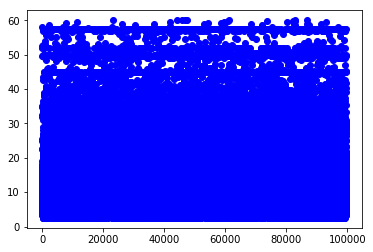

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,week,weekday,hour
0,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,25,0,17
1,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,1,1,16
2,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,33,3,0
3,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,16,5,4
4,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,10,1,7


In [35]:
%matplotlib inline
df = pd.read_csv('/home/anand/Documents/CSE Courses/Applied Machine Learning/Solutions/HW3_Solutions/new-york-city-taxi-fare-prediction(1)/train.csv',sep=',',nrows=pow(10,5))
df['pickup_datetime'] = pd.to_datetime(df.pickup_datetime)
df['year'] = df.pickup_datetime.dt.year
df['month'] = df.pickup_datetime.dt.month
df['week'] = df.pickup_datetime.dt.week
# df['day'] = df.pickup_datetime.dt.day
df['weekday'] = df.pickup_datetime.dt.weekday
df['hour'] = df.pickup_datetime.dt.hour

## Removing the outliers
df = df.query('1 <= fare_amount <= 60')

xt = np.arange(len(df))
plt.plot(xt,df['fare_amount'],'bo')
plt.show()

# df['key_new'] = df['key'].str.split('.').str[1]
# print(df['key_new'])

x = df[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count','year','month','week','weekday','hour']]
y = df['fare_amount']
df = df.drop(['pickup_datetime','fare_amount'],axis=1)

x.head()

In [26]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
# reg = linear_model.LinearRegression()
# reg = linear_model.Ridge(alpha=.05)
# reg = linear_model.Lasso(alpha=0.1)

# # X, y = make_regression(n_features=10, n_informative=2,random_state=0, shuffle=False)
# reg = RandomForestRegressor(max_depth=2, random_state=0,n_estimators=100)



# xa = np.arange(5,20,0.1)
# ya = xa

# reg.fit(X_train,y_train)
# # print(reg.coef_)
# # y_pred = reg.predict(X_test)
# print(reg.score(X_test,y_test))

# # y_pred = pd.DataFrame(y_pred)
# # y_new = pd.concat([y_test,y_pred],axis=1)
# # print(y_new)

# print(y_pred)
# print(y_test)
# plt.plot(y_test,y_pred,'ro')

# # print(r2_score(y_test,y_pred))

# plt.plot(xa,ya,'b')
# plt.show()

# plt.show()

In [ ]:
# %matplotlib inline
# xa = np.arange(0,30,0.1)
# ya = xa
# y_pred = reg.predict(X_test)
# print(y_pred)
# plt.plot(y_test,y_pred,'ro')
# plt.plot(xa,ya,'b')
# plt.show()


# # print("Test Accuracy = ", accuracy_score(y_test, y_pred))

In [1]:
df_test = pd.read_csv('/home/anand/Documents/CSE Courses/Applied Machine Learning/Solutions/HW3_Solutions/new-york-city-taxi-fare-prediction(1)/test.csv',sep=',')
df_test['pickup_datetime'] = pd.to_datetime(df_test.pickup_datetime)
df_test['year'] = df_test.pickup_datetime.dt.year
df_test['month'] = df_test.pickup_datetime.dt.month
df_test['week'] = df_test.pickup_datetime.dt.week
# df['day'] = df.pickup_datetime.dt.day
df_test['weekday'] = df_test.pickup_datetime.dt.weekday
df_test['hour'] = df_test.pickup_datetime.dt.hour

x_test = df_test[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count','year','month','week','weekday','hour']]
key = df_test['key']
key = pd.DataFrame(key)

# x_test.head()

NameError: name 'pd' is not defined

In [38]:
# reg = RandomForestRegressor(max_depth=4, random_state=0,n_estimators=300)
reg = xgb.XGBRegressor(n_estimators=500,min_child_weight=3.0,max_depth=7,learning_rate=0.1,colsample_bytree=0.7)
reg.fit(x,y)
y_pred = reg.predict(x_test)
y_pred = pd.DataFrame(y_pred)
y_test = pd.concat([key,y_pred],axis=1)

y_test.columns = y_test.columns.map(str)

y_test = y_test.rename(index=str, columns={"0":"fare_amount"})
y_test.to_csv("output.csv",index=False)
y_test

[11:31:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,key,fare_amount
0,2015-01-27 13:08:24.0000002,9.304505
1,2015-01-27 13:08:24.0000003,9.799435
2,2011-10-08 11:53:44.0000002,4.983077
3,2012-12-01 21:12:12.0000002,8.763581
4,2012-12-01 21:12:12.0000003,14.960098
5,2012-12-01 21:12:12.0000005,9.940401
6,2011-10-06 12:10:20.0000001,5.772568
7,2011-10-06 12:10:20.0000003,50.017818
8,2011-10-06 12:10:20.0000002,10.700200
9,2014-02-18 15:22:20.0000002,8.003452


In [32]:
reg_cv = GridSearchCV(reg, {"colsample_bytree":[0.5,0.7,0.8,1.0],"min_child_weight":[1.0,2.0,3.0,4.0]
                            ,'max_depth': [3,4,6,7], 'n_estimators': [100,300,400,500],"learning_rate":[0.01,0.05,0.1,0.5]}, verbose=1)
reg_cv.fit(X_train,y_train)

/home/anand/anaconda3/lib/python3.5/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 1024 candidates, totalling 3072 fits
[11:01:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:01:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:01:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:01:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:01:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:01:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:02:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:02:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:02:

[Parallel(n_jobs=1)]: Done 3072 out of 3072 | elapsed: 974.9min finished


[03:16:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.5], 'n_estimators': [100, 300, 400, 500], 'colsample_bytree': [0.5, 0.7, 0.8, 1.0], 'min_child_weight': [1.0, 2.0, 3.0, 4.0], 'max_depth': [3, 4, 6, 7]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [33]:
reg_cv.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.1,
 'max_depth': 7,
 'min_child_weight': 3.0,
 'n_estimators': 500}